## Data Analysis with Python
### Working with Real World Data Sets


### By Olamide Idowu

Welcome to this tutorial on data analysis with Python. This tutorial is a practical guide for beginners to learn how to use Python for data analysis using real world data sets. 

Prerequisites:

1. Python 3.7 via Anaconda Installer ( I recommend this instead of downloading Python 3.7 directly as anaconda comes with the packages you need for data analysis with Python; you can download it through this link: https://www.anaconda.com/products/individual#Downloads).

2. Some knowledge of python programming: If this is your first time working with python, it is advisable you learn some python basics first; however, this tutorial is designed for beginners, so as long as you can use a computer and have some statistics knowledge, you will learn from this tutorial.

**Data** : The dataset we will be using is a list of over 7,000 online reviews for 50 electronic products from websites like Amazon and Best Buy provided by Datafiniti's Product Database. The dataset includes the product names, brands, manufacturers, review date, source, rating, title, reviewer metadata, etc.
To follow this tutorial, you will have to download the data set through this link: https://data.world/datafiniti/amazon-and-best-buy-electronics


Let's start by importing the libraries we will need for this data analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder
from scipy import stats
import scipy.optimize as opt
from sklearn import preprocessing

!conda install -c conda-forge/label/cf202003 wordcloud --yes
from wordcloud import WordCloud, STOPWORDS
import string
import collections
print ('All libraries imported!')

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


All libraries imported!


**Importing the Dataset**

Once you complete the data download, read it into a pandas dataframe using the file path as shown in the code below. 

The dataset is in .csv format, hence we use the pd.read_csv() function, if it was an excel file, we would use pd.read_excel(). 

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\DatafinitiElectronicsProductData.csv')
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpfjP9uilAPnD_xdy6-,B007QOIP3M,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,2015-11-16T02:04:10Z,2018-04-07T05:41:45Z,NaN,NaN,https://i5.walmartimages.com/asr/8a26ea29-695b...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/7942845/review...,"Great tapes!Gave me all 60 minutes, also did w...",Well priced solid product,Moto88,https://www.walmart.com/ip/Sony-Mini-Digital-V...,2.724227e+10,6.2 ounces
1,AVpfjP9uilAPnD_xdy6-,B007QOIP3M,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,2015-11-16T02:04:10Z,2018-04-07T05:41:45Z,NaN,NaN,https://i5.walmartimages.com/asr/8a26ea29-695b...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/7942845/review...,"Four years ago, I started using these Sony Min...",Best Mini DVC's Available,Nuno,https://www.walmart.com/ip/Sony-Mini-Digital-V...,2.724227e+10,6.2 ounces
2,AVpg59zyilAPnD_xyv3y,B000O3TFWW,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,2014-10-29T11:41:58Z,2018-06-07T01:26:36Z,21.00 in x 17.00 in x 10.00 in,NaN,https://i5.walmartimages.com/asr/08372efb-7f0c...,...,True,10.0,5.0,http://reviews.bestbuy.com/3545/8285884/review...,"For the money, you can't beat these speakers. ...",Your friends will be jealous!,amick827,http://www.amazon.com/Yamaha-NS-IW480CWH--Ceil...,2.710810e+10,4.6 lbs
3,AVpg59zyilAPnD_xyv3y,B000O3TFWW,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,2014-10-29T11:41:58Z,2018-06-07T01:26:36Z,21.00 in x 17.00 in x 10.00 in,NaN,https://i5.walmartimages.com/asr/08372efb-7f0c...,...,True,4.0,4.0,http://reviews.bestbuy.com/3545/8285884/review...,Great speakers. I was just WoW when turned on ...,Got Speakers,Phoneman2003,http://www.amazon.com/Yamaha-NS-IW480CWH--Ceil...,2.710810e+10,4.6 lbs
4,AVpfnp8HLJeJML43AmVi,B000YA33DC,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",Black,2015-08-18T18:38:58Z,2018-01-29T07:34:55Z,NaN,5.603535e+10,https://static.bhphoto.com/images/itemImgPlace...,...,NaN,NaN,NaN,http://www.amazon.com/Lowepro-Flipside-DSLR-Ca...,I'm very satisfied with the purchase of this p...,Nice pack 58 of 60 people found this helpful. ...,EFis,https://www.bhphotovideo.com/c/product/531351-...,5.603535e+10,2.87 lbs


The df.head() functions shows the first 5 rows of the dataset as seen in the above output.

Its time to familiarise ourselves with the data set.


Let's confirm the size of the dataset imported.

In [3]:
df.shape

(7299, 27)

The output shows that the dataset contains 7299 rows and 27 columns

Let's check the columns we have so we can select the features useful for this analysis.

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

There are quite a number of features not needed based on the aim of this analysis. Let's detect the ones we need and name it df1.

In [5]:
df1 = df[['id', 'brand', 'categories', 'colors', 'name', 'reviews.date', 'reviews.doRecommend', 'reviews.rating', 'reviews.text']]
df1.head()

,id,brand,categories,colors,name,reviews.date,reviews.doRecommend,reviews.rating,reviews.text
0,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007-09-09T00:00:00.000Z,True,5.0,"Great tapes!Gave me all 60 minutes, also did w..."
1,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007-10-12T00:00:00.000Z,True,5.0,"Four years ago, I started using these Sony Min..."
2,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2007-10-17T00:00:00.000Z,True,5.0,"For the money, you can't beat these speakers. ..."
3,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2008-01-10T00:00:00.000Z,True,4.0,Great speakers. I was just WoW when turned on ...
4,AVpfnp8HLJeJML43AmVi,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",Black,Flipside 300 Backpack (Black),2008-05-22T00:00:00Z,NaN,NaN,I'm very satisfied with the purchase of this p...


I will love to change a few column names(I don't like have "." in my column names). We would do this using the rename() function:

In [6]:
df1.rename(columns={'reviews.date':'ReviewDate','reviews.doRecommend':'Recommend', 'reviews.rating':'Rating','reviews.text':'ReviewText'}, inplace=True)
df1.columns

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['id', 'brand', 'categories', 'colors', 'name', 'ReviewDate',
       'Recommend', 'Rating', 'ReviewText'],
      dtype='object')

In [7]:
df1.head()

,id,brand,categories,colors,name,ReviewDate,Recommend,Rating,ReviewText
0,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007-09-09T00:00:00.000Z,True,5.0,"Great tapes!Gave me all 60 minutes, also did w..."
1,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007-10-12T00:00:00.000Z,True,5.0,"Four years ago, I started using these Sony Min..."
2,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2007-10-17T00:00:00.000Z,True,5.0,"For the money, you can't beat these speakers. ..."
3,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2008-01-10T00:00:00.000Z,True,4.0,Great speakers. I was just WoW when turned on ...
4,AVpfnp8HLJeJML43AmVi,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",Black,Flipside 300 Backpack (Black),2008-05-22T00:00:00Z,NaN,NaN,I'm very satisfied with the purchase of this p...


Let's confirm the types of the variables.

In [8]:
df1.dtypes

id             object
brand          object
categories     object
colors         object
name           object
ReviewDate     object
Recommend      object
Rating        float64
ReviewText     object
dtype: object

Notice the date format of the review date, in order to reduce redundancies, it will be best to have just the year of the review. We can achieve this by first converting the values to datetime type  and then change the format to year only. 

In [9]:
df1['ReviewDate'] = pd.to_datetime(df1['ReviewDate'])
df1['ReviewDate'] = df1['ReviewDate'].dt.strftime('%Y')
df1.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,brand,categories,colors,name,ReviewDate,Recommend,Rating,ReviewText
0,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007,True,5.0,"Great tapes!Gave me all 60 minutes, also did w..."
1,AVpfjP9uilAPnD_xdy6-,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2007,True,5.0,"Four years ago, I started using these Sony Min..."
2,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2007,True,5.0,"For the money, you can't beat these speakers. ..."
3,AVpg59zyilAPnD_xyv3y,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...,2008,True,4.0,Great speakers. I was just WoW when turned on ...
4,AVpfnp8HLJeJML43AmVi,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",Black,Flipside 300 Backpack (Black),2008,NaN,NaN,I'm very satisfied with the purchase of this p...


Let's understand the statistics of our data using the decribe() function:

In [10]:
df1.describe()

,Rating
count,7135.000000
mean,4.371969
std,1.038561
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Now, the describe() function only calculates the statistics of numerical variables i.e type integer or type float, this is why it only gave us the statistics for the ratings as that is the only numerical variable in integer/float type. 

We can see the average rating is 4.37 hence the ratings in the dataset are mostly positive. We can see the statistics of the other variables by including the 'object' argument as shown below:

In [11]:
df1.describe(include=['object'])

,id,brand,categories,colors,name,ReviewDate,Recommend,ReviewText
count,7299,7299,7299,5280,7299,7238,5908,7294
unique,50,38,49,17,50,12,2,7205
top,AVpgfP3DilAPnD_xtG3M,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,Logitech 915-000224 Harmony Ultimate One 15-D...,2017,True,Using this with a Sony BD player and Onkyo 5.1...
freq,1604,1692,1604,2920,1604,2849,5401,7


We can see the most frquent brand, category, color and product. We can also see that majority of the products were recommended by the users and year 2017 had majority reviews. It is also visible from the counts that variables such as colors, review date, Recommend, 'Rating' and 'ReviewText' have missing values. 

There are different ways to treat missing/null/NaN values: we can fill them with the mean of the variable values, we can drop them, we can also leave them as it is because sometimes a null value means something. However, for this analysis and based on the peculiarity of this data set, it would be erroneous to fill out missing values as we might end up introducing bias. 

Hence we will drop them but not now in order not to miss out on important information when we visualize the data. 

Let's familiarise ourselves with the brands in this dataset and see how they are distributed.

In [12]:
df1['brand'].value_counts().reset_index()

,index,brand
0,Logitech,1692
1,Sony,1047
2,Microsoft,507
3,JBL,454
4,Samsung,426
5,Sling Media,342
6,Alpine,270
7,Pny,191
8,Sanus,162
9,MEE audio,160


We have 37 brands and the top five most frequent ones are Logitech, Sony, Microsoft, JBL, and Samsung.

Let's compare the average ratings of the brands over the years. We can start by grouping the brands and sorting them according to their average ratings using the groupby() function. But first let's take a slice of the data for brands and their ratings.

In [13]:
dfbrand=df1[['brand', 'Rating']]
dfbrand.head()

,brand,Rating
0,Sony,5.0
1,Sony,5.0
2,Yamaha,5.0
3,Yamaha,4.0
4,Lowepro,NaN


In [14]:
dfbrand=dfbrand.groupby('brand').mean().reset_index()

In [15]:
dfbrand.head()

,brand,Rating
0,Alpine,4.526923
1,Belkin,3.875000
2,Bose,4.600000
3,Bowers & Wilkins,4.766355
4,Boytone,4.453333


Let's sort the brands according to their average ratings in descending order.

In [16]:
dfbrand.sort_values(by=['Rating'], ascending=False)

,brand,Rating
14,Kicker,5.000000
26,SVS,5.000000
5,CLARITY-TELECOM,4.909091
7,Definitive Technology,4.851852
6,Corsair,4.798246
36,WD,4.796296
3,Bowers & Wilkins,4.766355
25,Power Acoustik,4.750000
37,Yamaha,4.669565
20,Midland,4.659091


We can see that Kicker, SVS, CLARITY-TELECOM, Definitive Technology and Corsair have top average ratings; but if you compare this list with the counts of the brands, you will realise that these brands have single digit frequencies, this is probably the reason for their high average ratings. It would be fair to compare brands with similar frequency counts to avoid bias.

Based on this, let's compare the ratings of the top 5 most frequent brands which are Logitech, Sony, Microsoft, JBL, and Samsung.

The next step is to select the data containing information of these brands.

In [17]:
dfbrand5= dfbrand.loc[dfbrand['brand'].isin(['Logitech','Sony', 'Microsoft', 'JBL', 'Samsung'])]
dfbrand5

,brand,Rating
12,JBL,4.370044
16,Logitech,3.992908
19,Microsoft,4.606061
27,Samsung,4.426190
32,Sony,4.520693


Let's visualize this using a bar plot, however, we would have to set the brand as index first for accurate plot interpretation.

In [18]:
dfbrand5.set_index('brand', inplace=True)
dfbrand5.head()

,Rating
brand,
JBL,4.370044
Logitech,3.992908
Microsoft,4.606061
Samsung,4.426190
Sony,4.520693


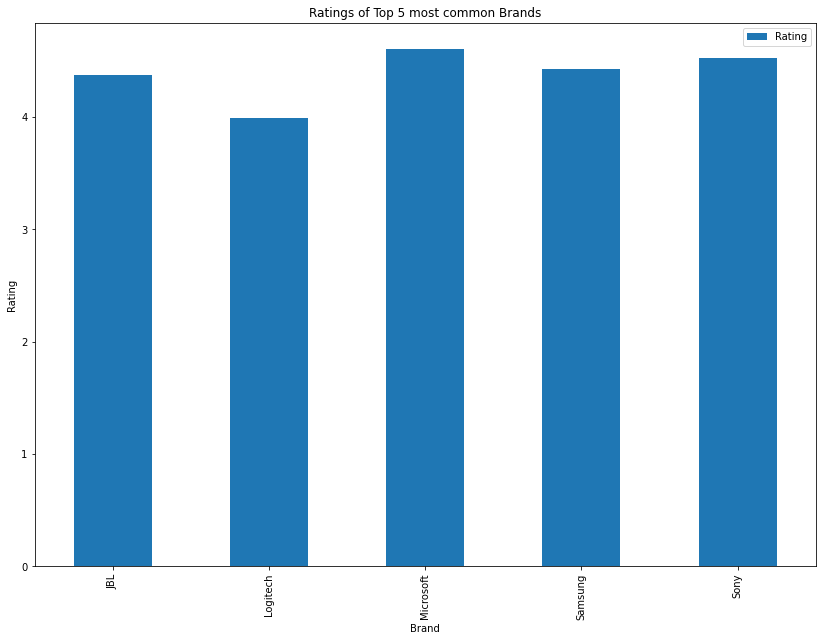

In [21]:
dfbrand5.plot(kind='bar', figsize=(14, 10))
plt.title('Ratings of Top 5 most common Brands')
plt.ylabel('Rating')
plt.xlabel('Brand')

plt.show()

We can see Microsoft has the best average rating followed by Sony and Samsung. We can also plot the chart as a horizontal bar plot by changing the kind to 'barh' instead of 'bar', we can also change the color of the chart and adjust the size as shown below

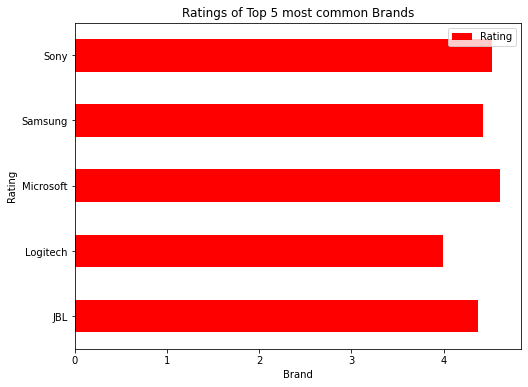

In [19]:
dfbrand5.plot(kind='barh', figsize=(8, 6), color='red')
plt.title('Ratings of Top 5 most common Brands')
plt.ylabel('Rating')
plt.xlabel('Brand')

plt.show()

Why don't we examine the three top rated brands of this plot (Microsoft, Sony, Samsung) and see the trend of their ratings over the years. We will need the review date variable for this, so we have to slice from the data set the reveiw date, brand and ratings.

In [20]:
dftrend = df1[['ReviewDate', 'brand', 'Rating']]
dftrend.head()

,ReviewDate,brand,Rating
0,2007,Sony,5.0
1,2007,Sony,5.0
2,2007,Yamaha,5.0
3,2008,Yamaha,4.0
4,2008,Lowepro,NaN


To make it easier to select the brands with .loc, let's set the brand as the index and transpose the data.

In [21]:
dftrend.set_index('brand', inplace=True)
dftrend.head()

,ReviewDate,Rating
brand,,
Sony,2007,5.0
Sony,2007,5.0
Yamaha,2007,5.0
Yamaha,2008,4.0
Lowepro,2008,NaN


In [22]:
dftrend.transpose()

brand,Sony,Sony,Yamaha,Yamaha,Lowepro,Sony,Sony,Sony,Yamaha,Lowepro,...,Definitive Technology,Definitive Technology,Definitive Technology,Definitive Technology,Definitive Technology,Definitive Technology,Definitive Technology,Definitive Technology,Alpine,CLARITY-TELECOM
ReviewDate,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,5,5,5,4,NaN,5,5,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


Let's start with Microsoft:

In [23]:
dftrendm=dftrend.loc[['Microsoft']]
dftrendm

,ReviewDate,Rating
brand,,
Microsoft,2015,5.0
Microsoft,2015,NaN
Microsoft,2015,NaN
Microsoft,2015,NaN
Microsoft,2015,NaN
...,...,...
Microsoft,2017,5.0
Microsoft,2017,5.0
Microsoft,2017,5.0


We can see the presence of NaN values, let's drop them first.

In [24]:
dftrendm = dftrendm.dropna()
dftrendm

,ReviewDate,Rating
brand,,
Microsoft,2015,5.0
Microsoft,2015,5.0
Microsoft,2015,5.0
Microsoft,2015,5.0
Microsoft,2015,5.0
...,...,...
Microsoft,2017,5.0
Microsoft,2017,5.0
Microsoft,2017,5.0


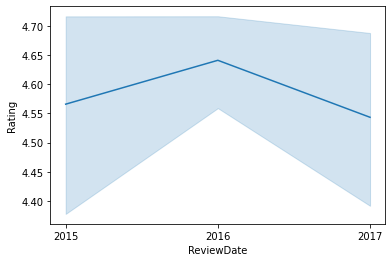

In [25]:
sns.lineplot(y="Rating", x="ReviewDate",data = dftrendm)

It is interesting to see that Microsoft ratings were on the increase from 2015 to 2016 and then began to drop. As at 2017 it had dropped lower than the point it started with in 2015. Is it possible that there was a problem with their products or there were more competing products from other brands?

Let's checkout Sony's performance over the years according to this data set:

In [26]:
dftrendso=dftrend.loc[['Sony']]
dftrendso

,ReviewDate,Rating
brand,,
Sony,2007,5.0
Sony,2007,5.0
Sony,2008,5.0
Sony,2008,5.0
Sony,2008,5.0
...,...,...
Sony,2018,5.0
Sony,2018,5.0
Sony,NaN,5.0


In [27]:
dftrendso = dftrendso.dropna()
dftrendso

,ReviewDate,Rating
brand,,
Sony,2007,5.0
Sony,2007,5.0
Sony,2008,5.0
Sony,2008,5.0
Sony,2008,5.0
...,...,...
Sony,2018,5.0
Sony,2018,5.0
Sony,2018,5.0


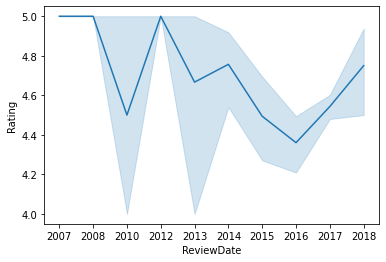

In [28]:
sns.lineplot(y="Rating", x="ReviewDate",data = dftrendso)

Sony's Ratings appears to be flunctuating over the years. Unlike the Microsoft data, review date ranges from 2007 to 2018 so it gives a good representation of the trend.

Notice the steep drop in ratings in 2010, it shot up again in 2012 and started dropping again with the lowest drop in 2016 after which it started going up. Based on this plot, the brand manufacturer should watch out for reasons for the drops at different periods in order to mitigate future drops. 

Lastly, let's examine's Samsung's trend.

In [29]:
dftrendsa=dftrend.loc[['Samsung']]
dftrendsa

,ReviewDate,Rating
brand,,
Samsung,2014,5.0
Samsung,2014,5.0
Samsung,2014,4.0
Samsung,2014,4.0
Samsung,2014,5.0
...,...,...
Samsung,2018,5.0
Samsung,2018,5.0
Samsung,2018,4.0


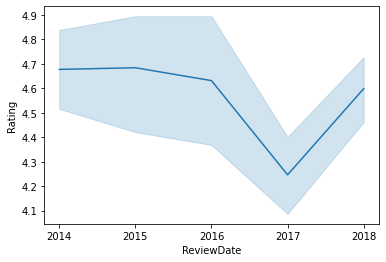

In [30]:
sns.lineplot(y="Rating", x="ReviewDate",data = dftrendsa)

This plot shows stable ratings for Samsung from 2014 to circa 2016 after which it started dropping to its lowest in 2017 and then gradually increased.

There are different ways to visualize data such as Area plots, waffle plots, scatter plots and so much more. Infact I believe each plot type deserves a tutorial. I advise you subscribe to join my mailing list so you can be alerted on my tutorials.

How about we check the correlation of the variables? It would be great to be able to predict that a product will be recommended based on variables like brand, category, and even ratings. Is there really a relationship between rating and recommendation? We can confirm this using correlation analysis.

However, correlation analysis can only be done with numerical variables, hence we would have to convert all the variables of interest to numerical variables using the scikit learn label encoder.

First, let's select the variables we want:

In [31]:
dfcorr = df1[['brand', 'categories', 'colors', 'Rating', 'Recommend']]
dfcorr

,brand,categories,colors,Rating,Recommend
0,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,5.0,True
1,Sony,"Electronics,Computers,Computer Accessories,Bla...",NaN,5.0,True
2,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,5.0,True
3,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,4.0,True
4,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",Black,NaN,NaN
...,...,...,...,...,...
7294,Definitive Technology,"Outdoor Speakers,Electronics Features,Electron...","Black,White",NaN,NaN
7295,Definitive Technology,"Outdoor Speakers,Electronics Features,Electron...","Black,White",NaN,NaN
7296,Definitive Technology,"Outdoor Speakers,Electronics Features,Electron...","Black,White",NaN,NaN
7297,Alpine,"Auto & Tires,Auto Electronics,Car Speakers and...",NaN,NaN,NaN


We would have to drop rows with missing/NaN values. 

In [32]:
dfcorr=dfcorr.dropna()
dfcorr

,brand,categories,colors,Rating,Recommend
2,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,5.0,True
3,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,4.0,True
12,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,5.0,True
13,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,5.0,True
25,Yamaha,"In-Wall & In-Ceiling Speakers,Electronics,In-C...",White,5.0,True
...,...,...,...,...,...
7220,Sony,"Portable Bluetooth Speakers,Audio Docks & Mini...","Black,Gray,Red,Blue",5.0,True
7222,Ultimate Ears,"Portable Bluetooth Speakers,Bluetooth & Wirele...","Blue,Graphite,Blue steel,Black,Merlot,Blizzard",5.0,True
7225,Ultimate Ears,"Portable Bluetooth Speakers,Bluetooth & Wirele...","Blue,Graphite,Blue steel,Black,Merlot,Blizzard",5.0,True
7226,Ultimate Ears,"Portable Bluetooth Speakers,Bluetooth & Wirele...","Blue,Graphite,Blue steel,Black,Merlot,Blizzard",3.0,True


Let's convert them to numerical values except 'Rating' which is already type float.

In [33]:
le = LabelEncoder() 
dfcorr['brand'] = le.fit_transform(dfcorr['brand'])
dfcorr['categories'] = le.fit_transform(dfcorr['categories'])
dfcorr['colors'] = le.fit_transform(dfcorr['colors'])
dfcorr['Recommend'] = le.fit_transform(dfcorr['Recommend'])
dfcorr

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,brand,categories,colors,Rating,Recommend
2,20,12,16,5.0,1
3,20,12,16,4.0,1
12,20,12,16,5.0,1
13,20,12,16,5.0,1
25,20,12,16,5.0,1
...,...,...,...,...,...
7220,18,17,2,5.0,1
7222,19,20,7,5.0,1
7225,19,20,7,5.0,1
7226,19,20,7,3.0,1


We can run a correlation analysis on the whole data with a single line of code. This will generate a correlation matrix that will show the strength of correlation between each variable and product recommendation.

In [34]:
dfcorr.corr()

,brand,categories,colors,Rating,Recommend
brand,1.000000,0.535223,0.148625,0.039855,0.043750
categories,0.535223,1.000000,0.214334,-0.003937,0.016705
colors,0.148625,0.214334,1.000000,0.019751,0.017380
Rating,0.039855,-0.003937,0.019751,1.000000,0.777560
Recommend,0.043750,0.016705,0.017380,0.777560,1.000000


We can see that only product ratings had strong correlation with product recommendation with a coefficient of 0.777560. 

We can also calculate the correlation coefficient and check the P-value (to measure statistical significance) using scipy. Since only rating shows correlation with recommendation, let's first slice out a fresh data set for ratings and recommendation, this is to include rows dropped due to the missing values of other variables.

In [35]:
dfrr= df1[['Rating', 'Recommend']]
dfrr

,Rating,Recommend
0,5.0,True
1,5.0,True
2,5.0,True
3,4.0,True
4,NaN,NaN
...,...,...
7294,NaN,NaN
7295,NaN,NaN
7296,NaN,NaN
7297,NaN,NaN


In [36]:
dfrr=dfrr.dropna()

In [37]:
dfrr

,Rating,Recommend
0,5.0,True
1,5.0,True
2,5.0,True
3,4.0,True
5,5.0,True
...,...,...
7233,4.0,True
7234,3.0,False
7235,3.0,False
7236,5.0,True


In [38]:
dfrr['Recommend'] = le.fit_transform(dfrr['Recommend'])
dfrr

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,Recommend
0,5.0,1
1,5.0,1
2,5.0,1
3,4.0,1
5,5.0,1
...,...,...
7233,4.0,1
7234,3.0,0
7235,3.0,0
7236,5.0,1


In [39]:
pearson_coef, p_value = stats.pearsonr(dfrr['Rating'], dfrr['Recommend'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7713315860187999  with a P-value of P = 0.0


The correlation coefficient is still about the same value and a P.Value of 0.0 shows that the strong correlation is statistically significant.

Let's dive into a bit of Machine Learning, shall we?

Like I mentioned earlier, it would be great to be able to predict recommendation of products especially as the world becomes more digital. However, most of the variables in these data sets are not correlated with product recommendation except rating.

This means that if a customer rates a product positively, there is likelihood that he/she will recommend the product to someone else or a potential customer. Let's model the relationship between ratings and recommendation in order to get introduced to machine learning/ regression analysis with Python.

Because the 'Recommend' variable is binary, i.e, either True(1) or False(2), it is best to use logistic regression.

Let's start by defining our X (Independent/predictor variable-Rating) and y(Dependent variable - Recommend)

In [40]:
X = np.asarray(dfrr[['Rating']])
X[0:5]

array([[5.],
       [5.],
       [5.],
       [4.],
       [5.]])

In [41]:
y = np.asarray(dfrr['Recommend'])
y [0:5]

array([1, 1, 1, 1, 1])

When modelling, it is best to create a train and test set. In simple words, we split the data set into two, use the train set to fit the data and the test set to validate our model. It is expected that our model is able to accurately predict the test set to a large extent .

I am setting the test data set size at 20% i.e 0.2 as shown in the code below. 

Random state ensures that the splits that we generate are reproducible. Scikit-learn uses random permutations to generate the splits.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4726, 1) (4726,)
Test set: (1182, 1) (1182,)


Next step is to fit the model using the train data set:

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Using thr fit model, let's use the test set to predict recommendation:

In [44]:
yhat = LR.predict(X_test)
yhat[0:5]

array([1, 1, 0, 1, 1])

** Model Evaluation**

Let's evaluate the model. There are different ways to evaluate a model. For this tutorial, we will use Jaccard Similarity Score and Confusion Matrix.

**Jaccard Similarity Score** is a statistic used in understanding the similarities between sample sets. In this case it is measuring the similarity between the y test set and the yhat (predicted Recommendation). The more similar the data sets, the higher the percentage of the score or the closer it is to 1.

**Confusion Matrix** summarises number of correct and incorrect predictions with count values and break them down by each class.

In [45]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.939932318104907

The Jaccard similarity score is 93.99%, showing that the actual and predicted y data sets are similar. Hence the model is fit.

Let's try confusion matrix:

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, yhat)
cnf_matrix

array([[  38,   71],
       [   0, 1073]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

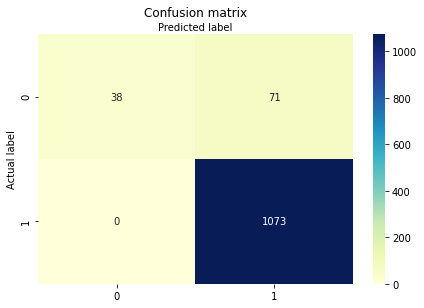

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("Precision:",metrics.precision_score(y_test, yhat))
print("Recall:",metrics.recall_score(y_test, yhat))

Accuracy: 0.939932318104907
Precision: 0.9379370629370629
Recall: 1.0


Accuracy is 93.99%, precision is 93.79% and Recall is 100% showing that the model predicts recommendation accurately.

So now that we see that rating is a good predictor for recommendations, let's examine the review text of positive and negative ratings, maybe we can identify features that can help get electronic products recommended.

We will do this using the Word cloud library.

Let's start with positive ratings i.e 4 and 5 star ratings:

In [49]:
dfrate=df1[['Rating', 'ReviewText']]
dfrate

,Rating,ReviewText
0,5.0,"Great tapes!Gave me all 60 minutes, also did w..."
1,5.0,"Four years ago, I started using these Sony Min..."
2,5.0,"For the money, you can't beat these speakers. ..."
3,4.0,Great speakers. I was just WoW when turned on ...
4,NaN,I'm very satisfied with the purchase of this p...
...,...,...
7294,NaN,I purchased a pair of these speakers for my La...
7295,NaN,I purchased a pair of these speakers for my La...
7296,NaN,This is the best all-around outdoor speaker I ...
7297,NaN,Bought these to replace stock speakers in my 0...


Let's drop NaN values

In [50]:
dfrate=dfrate.dropna()
dfrate

,Rating,ReviewText
0,5.0,"Great tapes!Gave me all 60 minutes, also did w..."
1,5.0,"Four years ago, I started using these Sony Min..."
2,5.0,"For the money, you can't beat these speakers. ..."
3,4.0,Great speakers. I was just WoW when turned on ...
5,5.0,Since I've gotten a Sony camera reccently I th...
...,...,...
7264,5.0,For the price I didn't expect much from these ...
7277,4.0,Overall this is a nice pet/baby monitor with g...
7280,4.0,Between the cats' tendency to treat the camera...
7281,4.0,Between the cats' tendency to treat the camera...


In [51]:
dfrate['Rating']=dfrate['Rating'].astype(int)
dfrate

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,ReviewText
0,5,"Great tapes!Gave me all 60 minutes, also did w..."
1,5,"Four years ago, I started using these Sony Min..."
2,5,"For the money, you can't beat these speakers. ..."
3,4,Great speakers. I was just WoW when turned on ...
5,5,Since I've gotten a Sony camera reccently I th...
...,...,...
7264,5,For the price I didn't expect much from these ...
7277,4,Overall this is a nice pet/baby monitor with g...
7280,4,Between the cats' tendency to treat the camera...
7281,4,Between the cats' tendency to treat the camera...


In [52]:
dfpos= dfrate.loc[dfrate['Rating'].isin([4, 5])]
dfpos

,Rating,ReviewText
0,5,"Great tapes!Gave me all 60 minutes, also did w..."
1,5,"Four years ago, I started using these Sony Min..."
2,5,"For the money, you can't beat these speakers. ..."
3,4,Great speakers. I was just WoW when turned on ...
5,5,Since I've gotten a Sony camera reccently I th...
...,...,...
7264,5,For the price I didn't expect much from these ...
7277,4,Overall this is a nice pet/baby monitor with g...
7280,4,Between the cats' tendency to treat the camera...
7281,4,Between the cats' tendency to treat the camera...


Let's clean the data for the text analysis:

We start by converting all to lower case to avoid repetitions.

In [53]:
dfpos['ReviewText']= dfpos['ReviewText'].str.lower()
dfpos['ReviewText'].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    great tapes!gave me all 60 minutes, also did w...
1    four years ago, i started using these sony min...
2    for the money, you can't beat these speakers. ...
3    great speakers. i was just wow when turned on ...
5    since i've gotten a sony camera reccently i th...
Name: ReviewText, dtype: object

Next step is to split and remove all punctuation marks.

In [54]:
dfpos1 = dfpos['ReviewText'].str.split(' ')
dfpos1.head()

0    [great, tapes!gave, me, all, 60, minutes,, als...
1    [four, years, ago,, i, started, using, these, ...
2    [for, the, money,, you, can't, beat, these, sp...
3    [great, speakers., i, was, just, wow, when, tu...
5    [since, i've, gotten, a, sony, camera, reccent...
Name: ReviewText, dtype: object

The next step is to join all the 'ReviewText' data in order to be able to work with word cloud.

In [55]:
dfposcleaned = []

for text in dfpos1:
    text = [x.strip(string.punctuation) for x in text]
    dfposcleaned.append(text)

dfposcleaned[0]

Pos_Rev = [" ".join(text) for text in dfposcleaned]
final_Pos_Rev = " ".join(Pos_Rev)
final_Pos_Rev[:500]

'great tapes!gave me all 60 minutes also did well with recording over old tape.downloads into computer at excellent quality as well.cannot go wrong with this product four years ago i started using these sony mini dv cassettes and was blown away by their quality the tapes themselves capture excellent video and audio recordings and they transfer this quality to my video editing software.i am also impressed with how durable these tapes are when i travel internationally these tapes sometimes get expo'

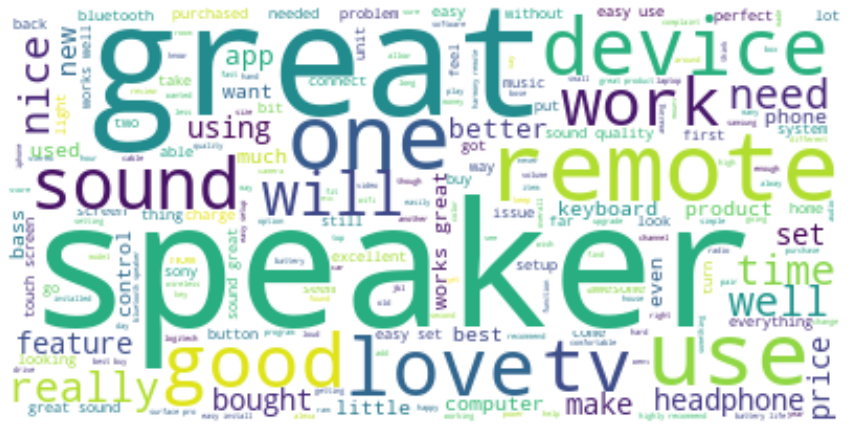

In [56]:
wordcloud_revpos = WordCloud(background_color="white").generate(final_Pos_Rev)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_revpos, interpolation='bilinear')
plt.axis("off")
plt.show()

The more frequent the word, the larger it is. This word cloud shows that speaker, great, remote are the most frequent in reviews with positve ratings.

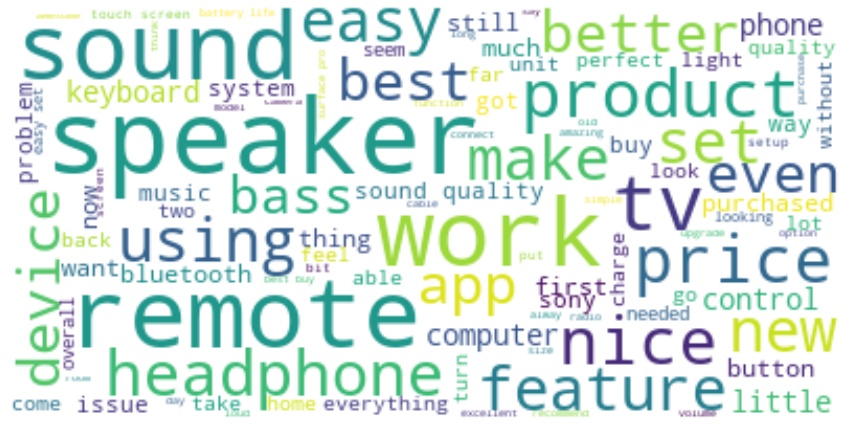

In [57]:
stopwords = set(STOPWORDS)
stopwords.update(["love","great","device","one","good","need", "will", "really", "use","used", "time", "well", "bought"])

wordcloud_revpos = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_Pos_Rev)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_revpos, interpolation='bilinear')
plt.axis("off")
plt.show()

So we can see more functional words like remote, better, nice, headphone, sound, price, speaker, bass, easy. It is safe to say that products with features like good sound, price, good speakers, ease of use, remote controls are more likely to get positive ratings and be recommended. 

Let's look at negative ratings i.e 1 and 2 star ratings. 

In [58]:
dfneg= dfrate.loc[dfrate['Rating'].isin([1, 2])]
dfneg

,Rating,ReviewText
85,2,I've had them in my car doors for about six mo...
154,2,My friend bought this mount and asked me to he...
168,1,Unfortunately the memory did not work. After I...
180,2,Nothing special about these speakers other tha...
267,1,Six months ago my FH and I bought a Panasonic ...
...,...,...
7069,2,I installed this on a PC with Windows 10 64 bi...
7079,2,Picture quality was not so great for a 1080P T...
7110,2,TV & Pic is as expected - unfortunately the sa...
7223,2,I used to have a laptop with a built in wirele...


In [59]:
dfneg['ReviewText']= dfneg['ReviewText'].str.lower()
dfneg['ReviewText'].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


85     i've had them in my car doors for about six mo...
154    my friend bought this mount and asked me to he...
168    unfortunately the memory did not work. after i...
180    nothing special about these speakers other tha...
267    six months ago my fh and i bought a panasonic ...
Name: ReviewText, dtype: object

In [60]:
dfneg = dfneg['ReviewText'].str.split(' ')
dfneg.head()

85     [i've, had, them, in, my, car, doors, for, abo...
154    [my, friend, bought, this, mount, and, asked, ...
168    [unfortunately, the, memory, did, not, work., ...
180    [nothing, special, about, these, speakers, oth...
267    [six, months, ago, my, fh, and, i, bought, a, ...
Name: ReviewText, dtype: object

In [61]:
dfnegcleaned = []

for text in dfneg:
    text = [x.strip(string.punctuation) for x in text]
    dfnegcleaned.append(text)

dfnegcleaned[0]

Neg_Rev = [" ".join(text) for text in dfnegcleaned]
final_Neg_Rev = " ".join(Neg_Rev)
final_Neg_Rev[:500]

"i've had them in my car doors for about six months now and sure they got pretty loud and clear with high frequencies but even with a 80 hz high-pass filter any bit of bass would make them distort i had them being powered by a pbr300x4 91 rms watts per channel/4 channels my friend bought this mount and asked me to help him install it he had a 65 plasma that weighed 91lbs this mount says it's ok for this tv and says it'll support up to 125lbs i install tv's in commercial applications all the time "

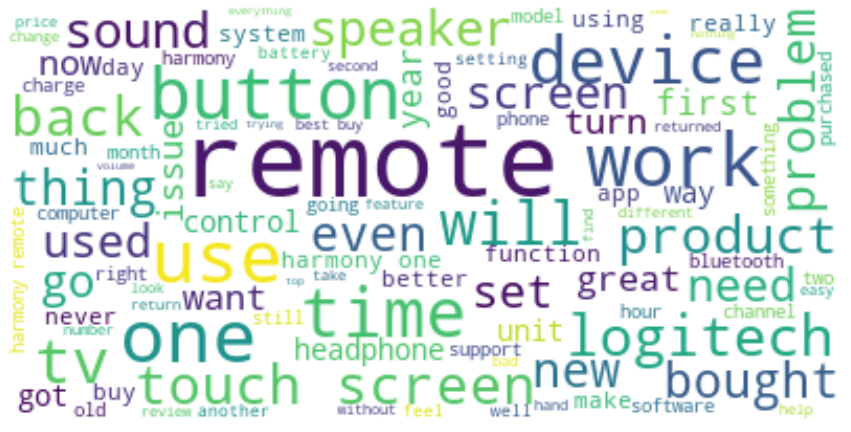

In [62]:
wordcloud_revneg = WordCloud(background_color="white", max_font_size=50, max_words=100).generate(final_Neg_Rev)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_revneg, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's remove less meaningful words using stop words

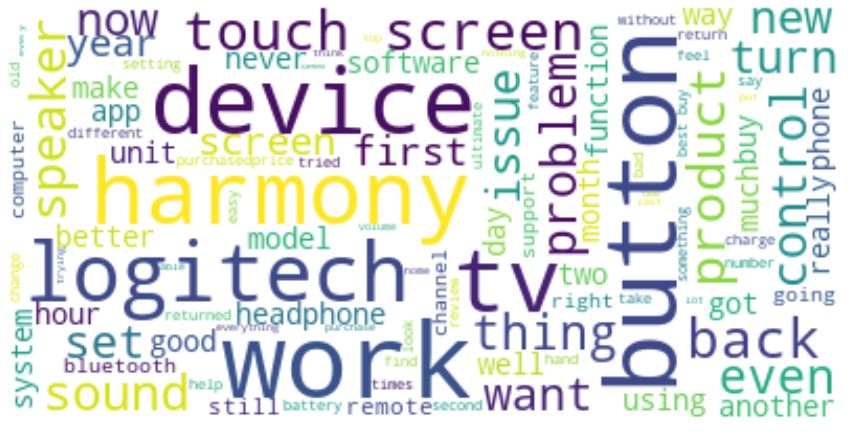

In [63]:
stopwords2 = set(STOPWORDS)
stopwords2.update(["great","go","use","one","remote", "will", "use","used", "time", "need", "bought"])

wordcloud_revneg = WordCloud(stopwords=stopwords2, background_color="white", max_font_size=50, max_words=100).generate(final_Neg_Rev)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_revneg, interpolation='bilinear')
plt.axis("off")
plt.show()

Features that caused negative ratings were button, harmony, sound, touch, screen. Logitech seems to be popularly mentioned in the reviews with negative ratings. 

We can also check the most frquent words and read them into a table. In this case the top 20 most common words in reviews with positive and negative ratings.

In [64]:
filtered_posrev = [word for word in final_Pos_Rev.split() if word not in stopwords]
counted_posrev = collections.Counter(filtered_posrev)

word_count_pos = {}

for letter, count in counted_posrev.most_common(20):
    word_count_pos[letter] = count
    
for i,j in word_count_pos.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: sound, count: 1859
Word: remote, count: 1398
Word: easy, count: 1365
Word: speaker, count: 1135
Word: works, count: 935
Word: tv, count: 916
Word: speakers, count: 807
Word: quality, count: 785
Word: set, count: 662
Word: price, count: 657
Word: product, count: 594
Word: best, count: 577
Word: nice, count: 530
Word: better, count: 520
Word: bluetooth, count: 520
Word: bass, count: 504
Word: headphones, count: 491
Word: much, count: 490
Word: music, count: 467
Word: new, count: 460


We can see that the most frequent word is sound, remote, easy, speaker, works, quality, price, etc.

Let's repeat the process for negative reviews.

In [65]:
filtered_negrev = [word for word in final_Neg_Rev.split() if word not in stopwords2]
counted_negrev = collections.Counter(filtered_negrev)

word_count_neg = {}

for letter, count in counted_negrev.most_common(20):
    word_count_neg[letter] = count
    
for i,j in word_count_neg.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: harmony, count: 206
Word: screen, count: 174
Word: tv, count: 170
Word: work, count: 146
Word: back, count: 123
Word: logitech, count: 122
Word: buttons, count: 120
Word: touch, count: 116
Word: buy, count: 104
Word: button, count: 103
Word: even, count: 97
Word: sound, count: 95
Word: device, count: 91
Word: new, count: 81
Word: much, count: 79
Word: product, count: 79
Word: remotes, count: 76
Word: set, count: 75
Word: support, count: 73
Word: turn, count: 72


### Conclusion and Recommendation

Good product ratings increase the likelihood of recommendations. Features like quality sound, ease of use, good speakers, fair prices and something that simply works or does the job with ease would help a product get good ratings and be recommended to another potential customer. 

Brands like Microsoft, sony and Samsung appear to have generally good ratings, however, it is import that the manufacturers continue to ensure they satisfy the customers and update themselves on new trends through compettion analysis for instance. 

Wholesalers and retailers can use the results of this data set to know the brands to invest in and features to watch out for. 